In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wbgapi as wb

In [129]:
homicide_file = "Resources/homicide_total_rate_and_count.csv"
kidnapping_file = "Resources/kidnapping_0.csv"
robbery_file = "Resources/robbery_0.csv"
seizure_file = "Resources/seizure-table.csv"
assault_file = "Resources/serious_assault_0.csv"

x_axis = ["2013", "2014", "2015", "2016", "2017"]

# Violent Crime

* Kidnapping
* Assault
* Robbery

In [130]:
def clean_crime_data(crime, file):
    # Read in our CSV File
    dataframe = pd.read_csv(file)
    
    # Create a new dataframe with only Brazil values
    dataframe = dataframe.loc[(dataframe["Unnamed: 2"] == "Brazil"), :]
    
    # Renaming the columns to be more usable
    dataframe = dataframe.rename(columns = {
        "Unnamed: 0": "Region",
        "Unnamed: 1": "Sub-Region",
        "Unnamed: 2": "Country",
        "2013": "2013 Count",
        "2013.1": "2013 Rate",
        "2014": "2014 Count",
        "2014.1": "2014 Rate",
        "2015": "2015 Count",
        "2015.1": "2015 Rate",
        "2016": "2016 Count",
        "2016.1": "2016 Rate",
        "2017": "2017 Count",
        "2017.1": "2017 Rate"})
    
    # Creating a new dataframe where the rows are the years
    # Since dataframe is only 1 row right now, we use iloc on row 0 and the specify the column name
    final_dataframe = pd.DataFrame({
        "Year": ["2013", "2014", "2015", "2016", "2017"],
        
        f"{crime} Count": [dataframe.iloc[0]["2013 Count"],
                       dataframe.iloc[0]["2014 Count"],
                       dataframe.iloc[0]["2015 Count"],
                       dataframe.iloc[0]["2016 Count"], 
                       dataframe.iloc[0]["2017 Count"] ],
        
        f"{crime} Rate": [dataframe.iloc[0]["2013 Rate"],
                      dataframe.iloc[0]["2014 Rate"],
                      dataframe.iloc[0]["2015 Rate"], 
                      dataframe.iloc[0]["2016 Rate"], 
                      dataframe.iloc[0]["2017 Rate"]]})
    
    # The data right now is in strings and I need it as numbers to plot
    # I created a list from the count column and then took out all of the commas
    count_list = final_dataframe[f"{crime} Count"].tolist()
    final_dataframe[f"{crime} Count"].replace({count_list[0]: count_list[0].replace(',', ''),
                                               count_list[1]: count_list[1].replace(',', ''),
                                               count_list[2]: count_list[2].replace(',', ''),
                                               count_list[3]: count_list[3].replace(',', ''),
                                               count_list[4]: count_list[4].replace(',', '')}, inplace=True)
    
    # Then I made the values in Count and Rate into numeric values
    final_dataframe[[f"{crime} Count", f"{crime} Rate"]] = final_dataframe[[f"{crime} Count", f"{crime} Rate"]].apply(pd.to_numeric)
    
    return final_dataframe.set_index("Year")

In [131]:
# This is where I call the function I just made and pass in the crime and the file

kidnapping_data = clean_crime_data("Kidnapping", kidnapping_file)
robbery_data = clean_crime_data("Robbery", robbery_file)
assault_data = clean_crime_data("Assault", assault_file)

In [132]:
# Merging the data all into 1 dataframe

merged_data = kidnapping_data.merge(robbery_data, how='outer', on = 'Year')
merged_thrice = merged_data.merge(assault_data, how='outer', on = 'Year')

In [133]:
merged_thrice

,Kidnapping Count,Kidnapping Rate,Robbery Count,Robbery Rate,Assault Count,Assault Rate
Year,,,,,,
2013,396,0.197,1012504,503.643,661494,329.04
2014,413,0.204,1282371,632.445,606252,298.99
2015,473,0.231,1550614,758.350,621009,303.71
2016,753,0.365,1590325,771.392,600920,291.48
2017,524,0.252,1657131,797.334,591881,284.79


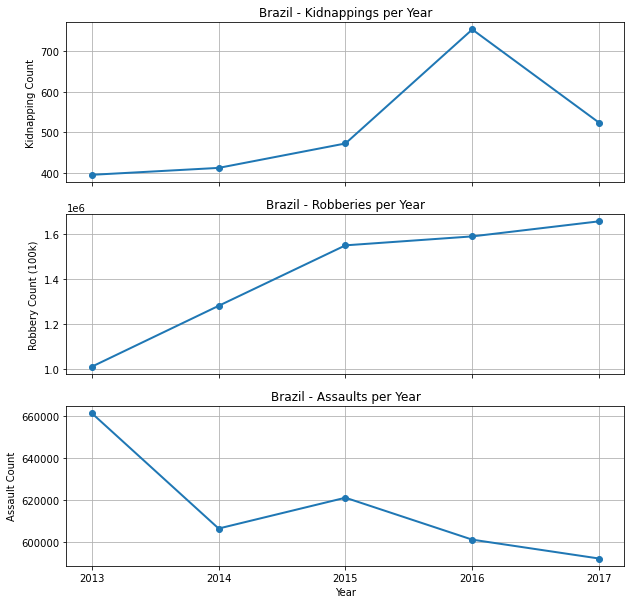

In [134]:
# Creating a figure that has 3 subplots to plot my violent crime data
# The figure will share the same x values being the years

fig, axs = plt.subplots(3, sharex=True, sharey=False, figsize=(10, 10))

axs[0].set_title("Brazil - Kidnappings per Year")
axs[0].plot(x_axis, merged_thrice["Kidnapping Count"], marker="o", linewidth=2)
axs[0].set_ylabel("Kidnapping Count")
axs[0].grid()

axs[1].set_title("Brazil - Robberies per Year")
axs[1].plot(x_axis, merged_thrice["Robbery Count"], marker="o", linewidth=2)
axs[1].set_ylabel("Robbery Count (100k)")
axs[1].grid()

axs[2].set_title("Brazil - Assaults per Year")
axs[2].plot(x_axis, merged_thrice["Assault Count"], marker="o", linewidth=2)
axs[2].set_ylabel("Assault Count")
axs[2].set_xlabel("Year")
axs[2].grid()


plt.savefig("Images/Violent_Crimes.png")
plt.show()

# Homicide

* Homicide Count and Rate(per 100k people)
* 2013 - 2017

In [135]:
def clean_homicide_data(crime, file):
    dataframe = pd.read_csv(file)
    
    dataframe = dataframe.loc[(dataframe["Territory"] == "Brazil"), :]
    
    dataframe = dataframe.loc[
        (dataframe["Year"] == 2013) |
        (dataframe["Year"] == 2014) |
        (dataframe["Year"] == 2015) | 
        (dataframe["Year"] == 2016) |
        (dataframe["Year"] == 2017), :]
    
    
    final_dataframe = pd.DataFrame({
    "Year": ["2013", "2014", "2015", "2016", "2017"],
        
    f"{crime} Count": [dataframe.iloc[0]["Value"],
                       dataframe.iloc[1]["Value"],
                       dataframe.iloc[2]["Value"],
                       dataframe.iloc[3]["Value"], 
                       dataframe.iloc[4]["Value"] ],
        
    f"{crime} Rate": [dataframe.iloc[5]["Value"],
                      dataframe.iloc[6]["Value"],
                      dataframe.iloc[7]["Value"], 
                      dataframe.iloc[8]["Value"], 
                      dataframe.iloc[9]["Value"]]})
    
    return final_dataframe.set_index("Year")
    

In [136]:
homicide_data = clean_homicide_data("Homicide", homicide_file)

In [137]:
homicide_data

,Homicide Count,Homicide Rate
Year,,
2013,54163.0,26.941954
2014,58497.0,28.849832
2015,58459.0,28.590256
2016,61597.0,29.877807
2017,64078.0,30.831363


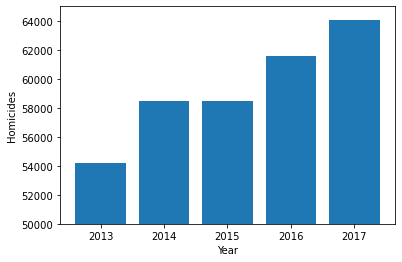

In [138]:
plt.bar(x_axis, homicide_data["Homicide Count"])
plt.ylim(50000, 65000)
plt.xlabel("Year")
plt.ylabel("Homicides")

plt.savefig("Images/Homicides.png")
plt.show()

# Drug Seizures

* Looking at the change in drug seizures over a 5 year period
* Looking for any correlation around the olympics


In [139]:
def clean_drug_data(crime, file):
    
    dataframe = pd.read_csv(file)
    
    dataframe = dataframe.loc[(dataframe["Country"] == "Brazil"), :]
    
    dataframe = dataframe.loc[
        (dataframe["Year"] == 2013) |
        (dataframe["Year"] == 2014) |
        (dataframe["Year"] == 2015) | 
        (dataframe["Year"] == 2016) |
        (dataframe["Year"] == 2017), :]
        
    grouped_dataframe = dataframe.groupby("Year").agg('sum')
    
    return grouped_dataframe

In [140]:
seizure_data = clean_drug_data("Seizures", seizure_file)

In [141]:
seizure_data

,KgEquivalent
Year,
2015,421214.787413
2016,337737.792714
2017,590307.585912


In [157]:
seizure_data.dtypes

KgEquivalent    float64
dtype: object

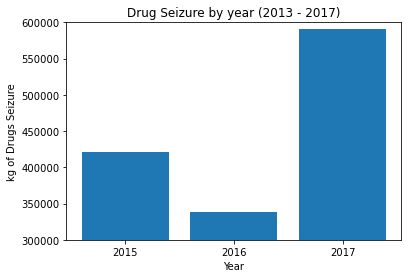

In [164]:
plt.bar(["2015", "2016", "2017"], seizure_data["KgEquivalent"])
plt.xlabel("Year")
plt.ylabel("kg of Drugs Seizure")
plt.title("Drug Seizure by year (2013 - 2017)")
plt.ylim(300000, 600000)

plt.savefig("Images/Drug Seizures by Year.png")
plt.show()

# Crime Index 2013 - 2017

* Data pulled from https://www.numbeo.com/crime/

* Crime Index is determined by this definition:

Crime Index is an estimation of overall level of crime in a given city or a country. We consider crime levels lower than 20 as very low, crime levels between 20 and 40 as being low, crime levels between 40 and 60 as being moderate, crime levels between 60 and 80 as being high and finally crime levels higher than 80 as being very high.


In [142]:
crime_index_2013 = "Resources/2013 Crime Index.csv"
crime_index_2014 = "Resources/2014 Crime Index.csv"
crime_index_2015 = "Resources/2015 Crime Index.csv"
crime_index_2016 = "Resources/2016 Crime Index.csv"
crime_index_2017 = "Resources/2017 Crime Index.csv"

file_list = [crime_index_2013, 
             crime_index_2014, 
             crime_index_2015, 
             crime_index_2016,
             crime_index_2017]


In [143]:
def read_Crime_Index():
    
    crime_index_df = pd.DataFrame(columns=["Year", "Country", "Crime Index"])
    
    file_list = [crime_index_2013, 
             crime_index_2014, 
             crime_index_2015, 
             crime_index_2016,
             crime_index_2017]
    
    year_list = ["2013", "2014","2015","2016","2017"]
    
    i = 0
    
    for x in file_list:
        dataframe = pd.read_csv(file_list[i])
        
        dataframe = dataframe.loc[dataframe["Country"] == "Brazil"]
        
        dataframe["Year"] = year_list[i]
    
        crime_index_df = crime_index_df.append(dataframe, ignore_index=True)
        
        i += 1
    
    crime_index_df = crime_index_df.set_index("Year")
    
    crime_index_df = crime_index_df[["Country","Crime Index"]]
    
    return crime_index_df

In [144]:
crime_index_df = read_Crime_Index()
crime_index_df

,Country,Crime Index
Year,,
2013,Brazil,62.62
2014,Brazil,67.00
2015,Brazil,68.95
2016,Brazil,71.23
2017,Brazil,70.62


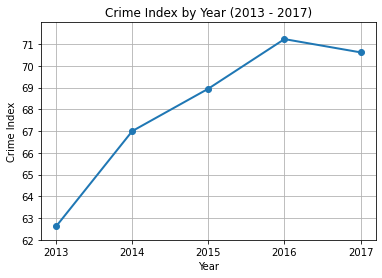

In [155]:
plt.plot(x_axis, crime_index_df["Crime Index"], marker="o", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Crime Index")
plt.title("Crime Index by Year (2013 - 2017)")
plt.grid()

plt.ylim(62, 72)
plt.yticks(np.arange(62, 72, step=1))

plt.savefig("Images/Crime Index by Year.png")
plt.show()